<center>
<img src="https://whatfix.com/blog/wp-content/uploads/2022/09/employee-churn.png">
    
</center>

# Андан на экономе: Групповой проект 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs

/Users/olegchernikov/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1. Предварительныя обработка

Данный датасет мы взяли с сайта kaggle. База данных принадлежит крупной американской компании, отдел кадров которой собрал данные о почти 10 000 сотрудниках, которые покинули компанию в период с 2016 по 2020 год. Они использовали информацию из собеседований, обзоров эффективности и записей сотрудников.

### Описание переменных 

* "department" - отдел, к которому принадлежит сотрудник.
* "promoted" - 1, если работник был повышен в должности в предыдущие 24 месяца, 0 в противном случае.
* "review" - совокупная оценка, которую сотрудник получил в результате последней оценки его производительности.
* "projects" - в скольких проектах участвует сотрудник.
* "salary" - по соображениям конфиденциальности заработная плата выходит на три уровня: низкая, средняя, высокая.
* "tenure" - сколько лет сотрудник работает в компании.
* "satisfaction" - мера удовлетворенности сотрудников по результатам опросов.
* "bonus" - 1, если сотрудник получил премию за предыдущие 24 месяца, 0 в противном случае.
* "avg_hrs_month" - среднее количество часов, которое сотрудник работал в месяц.
* "left" - "да", если сотрудник в конечном итоге ушел, "нет" в противном случае.

In [3]:
df = pd.read_csv('employee_churn_data.csv')
df

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes


In [8]:
df.isnull().sum()

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

В данных нет пропусков, поэтому дополнительной обработки не требуется.

# 2. Визуализация  и проверка гипотез

## Проверяем корреляцию между переменными

In [3]:
df.corr()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
promoted,1.000000,0.001879,0.010107,0.001410,-0.011704,0.001072,-0.002190
review,0.001879,1.000000,0.000219,-0.184133,-0.349778,-0.003627,-0.196096
projects,0.010107,0.000219,1.000000,0.022596,0.002714,0.002654,0.021299
tenure,0.001410,-0.184133,0.022596,1.000000,-0.146246,-0.000392,0.978618
satisfaction,-0.011704,-0.349778,0.002714,-0.146246,1.000000,0.000704,-0.143142
bonus,0.001072,-0.003627,0.002654,-0.000392,0.000704,1.000000,-0.000370
avg_hrs_month,-0.002190,-0.196096,0.021299,0.978618,-0.143142,-0.000370,1.000000


В общем и целом, признаками почти не коррелируют. Однако заметна очень сильная корреляция между tenure и avg_hrs_month.

Посмотрим на эти переменные поближе.

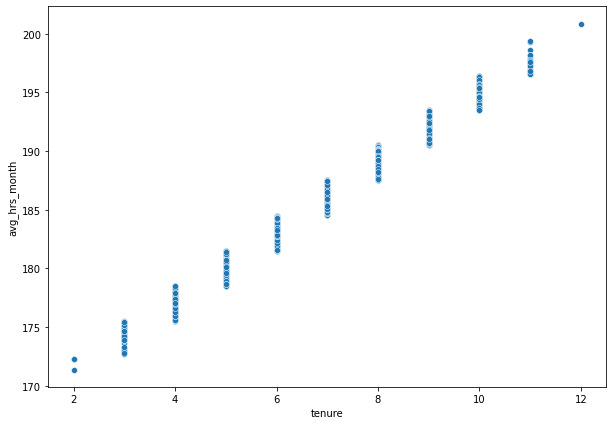

In [41]:
# Для начала посмотрим на их совместные график

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='tenure', y='avg_hrs_month');

Дейсвительно наблюдается четкая положительная линейная зависимость.

Теперь давайте посмотрим на количественную связь этих двух переменных, построив линейную регрессию.

In [42]:
# Построим линейную регрессию, чтобы посмотреть количественную связь между пременными:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

y = np.array(df['avg_hrs_month']).reshape(-1, 1)

X = np.array(df['tenure']).reshape(-1, 1)

lr.fit(X, y)

print(f'w0: {lr.intercept_[0]}')
print(f'w1: {lr.coef_[0][0]}')

w0: 165.87350177674287
w1: 2.8657017484394425


Получается, что за каждый дополнительный год работы в компании, работник работает примерно на 3 часа в месяц больше (коэффициент w1). 

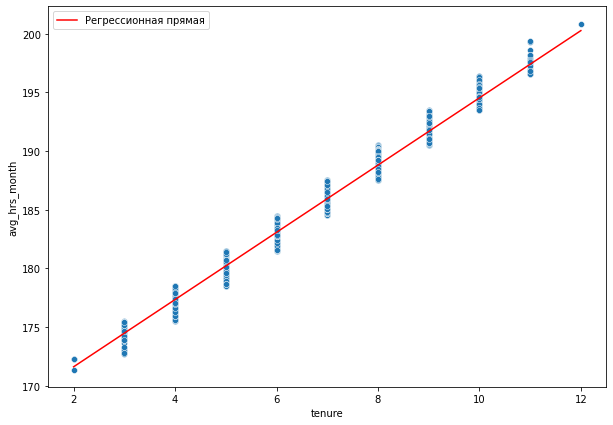

In [43]:
# построим регрессионную прямую на графике:

plt.figure(figsize=(10, 7))

grid = np.linspace(2, 12, 100)
line = lr.predict(grid[:, np.newaxis])

plt.plot(grid, line, label='Регрессионная прямая', color='red')
sns.scatterplot(data=df, x='tenure', y='avg_hrs_month')
plt.legend();

In [44]:
from sklearn.metrics import r2_score

print(f'R2: {r2_score(y, lr.predict(X))}')

R2: 0.9576929819139308


Но это еще не все, с помощью бутстрапа давайте посмотрим на распределение корреляции между tenure и avg_hrs_month, чтобы посмотреть на примерный диапазон корреляции. 

In [46]:
from sklearn.utils import resample

samples_1 = df['tenure']
samples_2 = df['avg_hrs_month']

results = []

for nrepeat in range(1000):
    sample_1 = resample(samples_1)
    sample_2 = resample(samples_2)
    results.append(sample_1.corr(sample_2))
    
results = pd.Series(results)
print('Статистика бутстрапа:')
print(f'исходно: {samples_1.corr(samples_2)}')
print(f'смещение: {results.mean() - samples_1.corr(samples_2): .18f}')
print(f'станд. ошибка: {results.std()}')
print(f'p-value: {np.array([(samples_1.corr(samples_2) > results) | (samples_1.corr(samples_2) < results)]).mean()}')

Статистика бутстрапа:
исходно: 0.9786178937225347
смещение: -0.000000637481644805
станд. ошибка: 0.0005941303831116991
p-value: 1.0


Видно, что смещение и стандартная ошибка ничтожно малы, а p-value равно 1, поэтому заключаем, что истинная корреляция действительно находится в районе 1. 

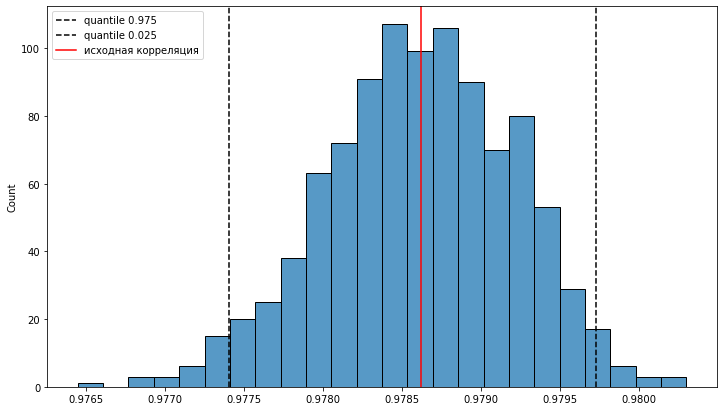

In [47]:
# В дополнение нарисуем график бутстраповского распредления с исходной корреляцией и квантилями уровня 0.025 и 0.0975

right_q = results.quantile(0.975)
left_q = results.quantile(0.025)
p_value = np.array([samples_1.corr(samples_2) > results]).mean()


plt.figure(figsize=(12, 7))
sns.histplot(results)
plt.axvline(right_q, ls='--', color='black', label='quantile 0.975')
plt.axvline(left_q, ls='--', color='black', label='quantile 0.025')
plt.axvline(samples_1.corr(samples_2), color='red', label='исходная корреляция')
plt.legend();

## Анализ зависимой и независимых переменных

### Как доброкачественный исследователь заранее установим уровень значимости для всех гипотез:

* alpha = 0.05

В этом разделе проведем анализ зависимой или целейвой перменной (left) и всеми остальными переменными. 

Посмотрим на общую таблицу между left и остальными независимыми переменными, показывающую среднее и медиану по всем департаментам.

In [4]:
df.pivot_table(index='department', columns='left', aggfunc='mean')

avg_hrs_month                 bonus            projects            \
left                   no         yes        no       yes        no       yes   
department                                                                      
IT             184.718036  185.051092  0.223577  0.218182  3.280488  3.309091   
admin          184.279012  185.200044  0.190789  0.176471  3.279605  3.277311   
engineering    184.687567  184.702814  0.215941  0.199085  3.266914  3.256293   
finance        184.204821  184.838697  0.227891  0.240741  3.292517  3.296296   
logistics      184.738019  184.257711  0.208835  0.207207  3.253012  3.324324   
marketing      184.511956  184.373363  0.223614  0.209877  3.288014  3.263374   
operations     184.800634  184.840330  0.207182  0.206422  3.282689  3.243119   
retail         184.683092  184.853169  0.218692  0.218684  3.263551  3.271762   
sales          184.645990  184.543420  0.220654  0.189944  3.302377  3.245810   
support        184.581743  184.793479  0.204589  0.202830  3.267686  3.268868   

             promoted              review           satisfaction            \
left               no       yes        no       yes           no       yes   
department                                                                   
IT           0.028455  0.009091  0.631078  0.685021     0.521494  0.503126   
admin        0.036184  0.042017  0.632829  0.683507     0.521383  0.514491   
engineering  0.026877  0.013730  0.633259  0.693421     0.510464  0.491315   
finance      0.054422  0.027778  0.637610  0.702093     0.505762  0.473831   
logistics    0.024096  0.009009  0.631618  0.705420     0.491691  0.496209   
marketing    0.051878  0.020576  0.641569  0.694788     0.500591  0.506597   
operations   0.035912  0.013761  0.637108  0.693970     0.506420  0.500138   
retail       0.037383  0.025478  0.632577  0.690079     0.501145  0.506457   
sales        0.026746  0.026071  0.635219  0.692769     0.504261  0.505169   
support      0.036329  0.018868  0.636953  0.683805     0.502094  0.517643   

               tenure            
left               no       yes  
department                       
IT           6.589431  6.654545  
admin        6.417763  6.705882  
engineering  6.552363  6.572082  
finance      6.384354  6.592593  
logistics    6.562249  6.450450  
marketing    6.522361  6.460905  
operations   6.597606  6.635321  
retail       6.572897  6.632696  
sales        6.546062  6.510242  
support      6.541109  6.622642

In [5]:
df.pivot_table(index='department', columns='left', aggfunc='median')

avg_hrs_month             bonus     projects     promoted      \
left                   no         yes    no yes       no yes       no yes   
department                                                                  
IT             184.053201  186.686006     0   0        3   3        0   0   
admin          183.397197  186.920696     0   0        3   3        0   0   
engineering    184.248149  186.317731     0   0        3   3        0   0   
finance        183.837452  185.938101     0   0        3   3        0   0   
logistics      184.112418  185.366300     0   0        3   3        0   0   
marketing      183.728915  185.819590     0   0        3   3        0   0   
operations     184.332114  186.184013     0   0        3   3        0   0   
retail         184.093481  186.314061     0   0        3   3        0   0   
sales          184.110095  186.360522     0   0        3   3        0   0   
support        184.030484  186.725031     0   0        3   3        0   0   

               review           satisfaction           tenure       
left               no       yes           no       yes     no  yes  
department                                                          
IT           0.624653  0.689516     0.512767  0.461514    6.0  7.0  
admin        0.631858  0.683831     0.529373  0.501404    6.0  7.0  
engineering  0.630666  0.698643     0.507769  0.471104    6.0  7.0  
finance      0.641840  0.708402     0.502088  0.463131    6.0  7.0  
logistics    0.634633  0.708827     0.485482  0.490095    6.0  7.0  
marketing    0.639058  0.709502     0.507515  0.503920    6.0  7.0  
operations   0.635065  0.702550     0.504704  0.495719    6.0  7.0  
retail       0.635098  0.694396     0.502068  0.494263    6.0  7.0  
sales        0.633836  0.695902     0.502675  0.494571    6.0  7.0  
support      0.636948  0.685442     0.492779  0.516237    6.0  7.0

Есть несколько интересных зависимостей, которые могут оказаться статистически значимыми. Давайте посмотрим на признаки поподробнее. 

### left и department

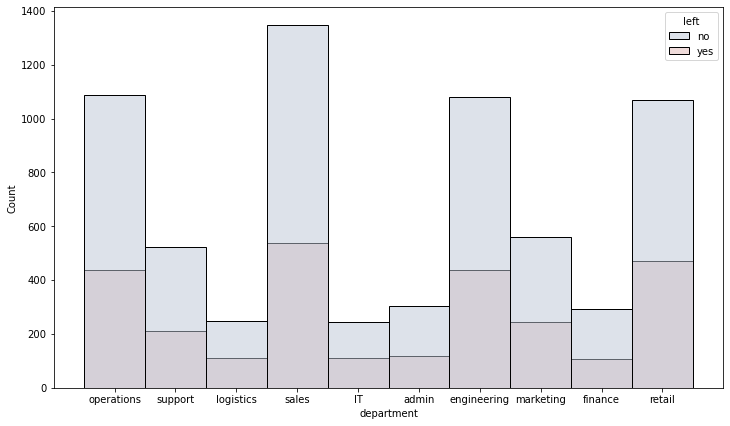

In [50]:
# начнем с графика, который показывает сколько людей ушло в каждом департаменте.

plt.subplots(figsize=(12,7))
sns.histplot(data=df, x='department', hue='left', palette='vlag', multiple='layer');

Вывод: столбчатая диаграмма показывает зависимость текучести кадров от департамента, в котором работает сотрудник. Из нее следует вывод, что везде сохраняется примерно одна и та же пропорция ушел/остался. Количество уволившихся работников в департаментах составляет около 30 % от общего количества сотрудников. Следовательно, большая часть работников в каждом департаменте принимает решение продолжать работать и не уходить с места работы. Мы бы хотели проверить гипотезу о том, что люди, которые ушли, составляют 30% от общего количества сотрудников. 


Проверяем следующую гипотезу: 

$$
\begin{aligned}
&H_0: \hspace{2mm} p = 0.3 \\
&H_1: \hspace{2mm} p \ne 0.3 
\end{aligned}
$$

In [51]:
hypothesis = 0.3 # нулевая гипотеза

d = df.groupby('department')['left'].value_counts().unstack()
d['%_left'] = d['yes'] / (d['yes'] + d['no'])
left = scs.norm.cdf((d['%_left'] - hypothesis) / np.sqrt((hypothesis*(1 - hypothesis)) / (d['yes'] + d['no'])))
right = 1-scs.norm.cdf((d['%_left'] - hypothesis) / np.sqrt((hypothesis*(1 - hypothesis)) / (d['yes'] + d['no'])))
mins = np.array([min(x, y) for x, y in zip(left, right)]) # смотрим какой из хвостов меньше
d['p_value'] = 2*mins
d

left,no,yes,%_left,p_value
department,,,,
IT,246,110,0.3090,0.7113
admin,304,119,0.2813,0.4019
engineering,1079,437,0.2883,0.3185
finance,294,108,0.2687,0.1703
logistics,249,111,0.3083,0.7301
marketing,559,243,0.3030,0.8533
operations,1086,436,0.2865,0.2492
retail,1070,471,0.3056,0.6287
sales,1346,537,0.2852,0.1606


Как видно из последней колонки (p_value), при уровне значимости равном 5% мы не отвергаем нулевую гипотезу ни в одном из департаментов.

In [52]:
# ищем p-value для всей выборки

x = df['left'].replace({'no': 0, 'yes': 1}).values

from statsmodels.stats.weightstats import ztest,zconfint

_, pvalue = ztest(x, value=0.3, alternative='two-sided')
pvalue

0.07899035066238765

Для всей выборки мы также не отвергаем H0

In [53]:
# ищем ДИ

p_hat = x.mean()
alpha = 0.05
z = scs.norm.ppf(1-alpha/2)

p_hat-z*np.sqrt(p_hat*(1-p_hat)/len(x)), p_hat+z*np.sqrt(p_hat*(1-p_hat)/len(x))

(0.28270158646688087, 0.3009462122752575)

### promoted и left

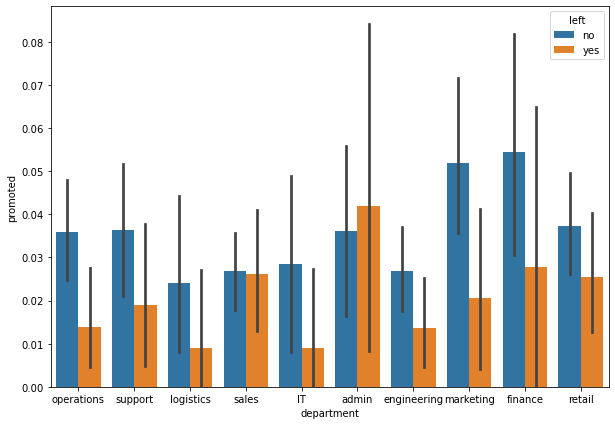

In [54]:
# Следующий график будет между promoted и left

plt.subplots(figsize=(10,7))
sns.barplot(data=df, x='department', y='promoted', hue='left');

Вывод: данная столбчатая диаграмма показывает зависимость текучести кадров от продвижения по карьерной лестнице в различных департаментах, мы заметили следующую закономерность: тех работников, которые по итогу уволились, в большинстве департаментов реже повышали, чем работников, которые продолжили работать в этой компании. 
Давайте проверим гипотезу о том, что в  департаментах одинаково повышали и тех, и других. 

Проверяем следующую гипотезу: 

$$
\begin{aligned}
&H_0: \hspace{2mm} p_x - p_y = 0 \\
&H_1: \hspace{2mm} p_x - p_y > 0 
\end{aligned}
$$

где X - люди, которые не ушли

In [55]:
df_p = pd.pivot_table(df, index='department', columns='left', values='promoted', aggfunc='value_counts').unstack()
df_p['%_promoted_no'] = df_p['no'][1] / (df_p['no'][1] + df_p['no'][0])
df_p['%_promoted_yes'] = df_p['yes'][1] / (df_p['yes'][1] + df_p['yes'][0])

hypothesis = 0

diff = df_p['%_promoted_no'] - df_p['%_promoted_yes']
    
var_1 = (df_p['%_promoted_no']*(1-df_p['%_promoted_no'])/(df_p['no'][0]+df_p['no'][1]))
var_2 = (df_p['%_promoted_yes']*(1-df_p['%_promoted_yes'])/(df_p['yes'][0]+df_p['yes'][1]))

df_p['p_value'] = 1-scs.norm.cdf((diff-hypothesis)/np.sqrt(var_1+var_2))

df_p

left           no      yes     %_promoted_no %_promoted_yes p_value
promoted        0   1    0   1                                     
department                                                         
IT            239   7  109   1        0.0285         0.0091  0.0824
admin         293  11  114   5        0.0362         0.0420  0.6080
engineering  1050  29  431   6        0.0269         0.0137  0.0384
finance       278  16  105   3        0.0544         0.0278  0.0981
logistics     243   6  110   1        0.0241         0.0090  0.1270
marketing     530  29  238   5        0.0519         0.0206  0.0083
operations   1047  39  430   6        0.0359         0.0138  0.0026
retail       1030  40  459  12        0.0374         0.0255  0.1001
sales        1310  36  523  14        0.0267         0.0261  0.4670
support       504  19  208   4        0.0363         0.0189  0.0799

In [56]:
# Проверим ту же гипотезу по всей выборке:


p_x = df[df['left'] == 'no']['promoted'].mean()
p_y = df[df['left'] == 'yes']['promoted'].mean()

n_x = df[df['left'] == 'no'].shape[0]
n_y = df[df['left'] == 'yes'].shape[0]

diff = p_x - p_y

var_1 = p_x*(1-p_x)/n_x
var_2 = p_y*(1-p_y)/n_y

print(f'p-value по всей выборке: {1 - scs.norm.cdf(diff/np.sqrt(var_1 + var_2)): .10f}')

p-value по всей выборке:  0.0000338623


Как видно, в большинтсве случаев мы не отвергаем нулевую гипотезу на уровне значимости 5%. Несмотря на это в некоторых департаментах мы все же отвергаем H0, так как p-value там очень маленькое. Такими департаментами являются: operations, marketing, engineering. В них можно говорить о том, что людей, которые не ушли, больше повышали.

Еще одним тестом, который можно провести в рамках той же гипотезы, является тест хи-квадрат независимости. 

In [57]:
df_p = pd.pivot_table(df, index='department', columns='left', values='promoted', aggfunc='value_counts').unstack()
df_p

left           no      yes    
promoted        0   1    0   1
department                    
IT            239   7  109   1
admin         293  11  114   5
engineering  1050  29  431   6
finance       278  16  105   3
logistics     243   6  110   1
marketing     530  29  238   5
operations   1047  39  430   6
retail       1030  40  459  12
sales        1310  36  523  14
support       504  19  208   4

In [58]:
from scipy.stats import chi2_contingency

statistics = {}
p_values = {}

for index in df_p.index:

    obs = np.vstack([np.array(df_p.loc[index]['no']), np.array(df_p.loc[index]['yes'])])
    statistic, pvalue, df, matrix = chi2_contingency(obs)

    statistics[index] = statistic
    p_values[index] = pvalue


df_p['chi2_statistic'] = statistics
df_p['p_value'] = p_values

df_p

left           no      yes     chi2_statistic p_value
promoted        0   1    0   1                       
department                                           
IT            239   7  109   1         0.5657  0.4520
admin         293  11  114   5         0.0000  1.0000
engineering  1050  29  431   6         1.8362  0.1754
finance       278  16  105   3         0.7238  0.3949
logistics     243   6  110   1         0.2961  0.5864
marketing     530  29  238   5         3.3532  0.0671
operations   1047  39  430   6         4.5758  0.0324
retail       1030  40  459  12         1.0800  0.2987
sales        1310  36  523  14         0.0000  1.0000
support       504  19  208   4         0.9959  0.3183

In [65]:
# тест хи-квадрат для всей выборки:

pr_no = df[df['left'] == 'no']['promoted'].value_counts()
pr_yes = df[df['left'] == 'yes']['promoted'].value_counts()

x = np.vstack([pr_no, pr_yes])

statistic, pvalue, df, matrix = chi2_contingency(x)

print(f'Cтатистика хи-квадрат для всей выборки: {statistic}')
print(f'p-value для всей выборки: {pvalue}')

Cтатистика хи-квадрат для всей выборки: 12.43572533642883
p-value для всей выборки: 0.00042119870637448567


Видим, что тест хи-квадрат показывает чуть другую картину, и теперь на уровне значимости 5% мы можем говорить о наличии неслучайности только в operations. Тем не менее и marketing, и engineering также имеют достаточно маленькое p-value, ровно как и значение p-value для всей выборки. 

### left и tenure

Вполне возможно, однако, что ушедшие из компании люди просто-напросто меньше прорабатывали в ней, поэтому их логично и меньше повышали. Давайте посмотрим на связь переменных left и tenure.

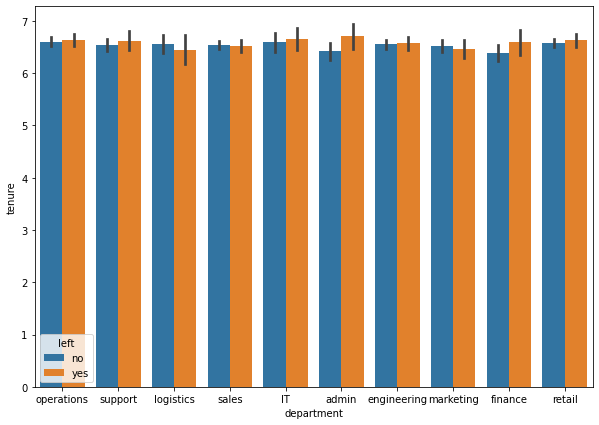

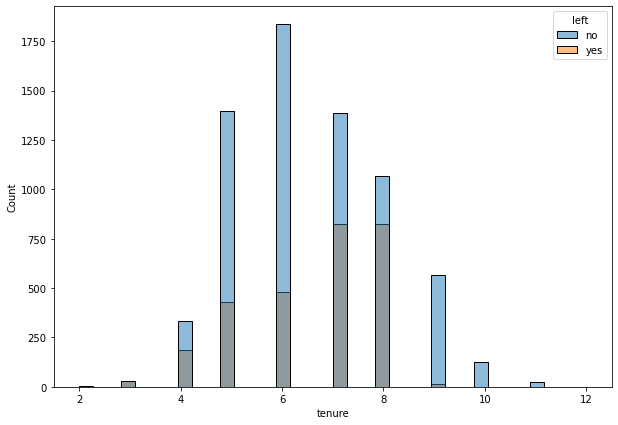

In [4]:
plt.subplots(figsize=(10,7))
sns.barplot(data=df, x='department', y='tenure', hue='left')
plt.subplots(figsize=(10,7))
sns.histplot(data=df, x='tenure', hue='left');

Вывод: Столбчатая диаграмма показывает зависимость текучести кадров от количества лет, проработанных в компании, по каждому департаменту. По графикам видим, что ситуация как раз обратная. Из нее следует, что уволившиеся работники в некоторых департаментах проработали в компании столько же или даже чуть дольше, чем те, которые остались. Гистограмма по всей выборке, а не по конкретным департаментам, уже более наглядно показывает, что количество уволившихся сотрудников с годами, проработанных в компании, увеличивается. Поэтому проверим гипотезу о том, что решившие уйти в среднем прорабатывали в компании столько же лет, как и оставшиеся, против альтернативной гипотезы о том, что оставшиеся работают в компании дольше.

Проверяем следующую гипотезу: 

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_x - \mu_y = 0 \\
&H_1: \hspace{2mm} \mu_x - \mu_y > 0 
\end{aligned}
$$

где X - люди, которые не ушли

In [9]:
df_2 = pd.pivot_table(data=df, index='department', columns='left', values='tenure', aggfunc=['mean', 'var', 'count'])
hypothesis = 0
mu_x = df_2['mean']['no']
mu_y = df_2['mean']['yes']
var_x = df_2['var']['no']
var_y = df_2['var']['yes']
n_x = df_2['count']['no']
n_y = df_2['count']['yes']

df_2['p_value'] = 1-scs.norm.cdf((mu_x - mu_y) / np.sqrt(var_x/n_x + var_y/n_y))
df_2

mean                 var           count        p_value
left               no       yes        no       yes    no  yes          
department                                                              
IT           6.589431  6.654545  2.242990  1.530942   246  110  0.666046
admin        6.417763  6.705882  2.079023  1.802592   304  119  0.973997
engineering  6.552363  6.572082  2.151012  1.612338  1079  437  0.603175
finance      6.384354  6.592593  1.896137  1.739010   294  108  0.917230
logistics    6.562249  6.450450  2.029376  2.049795   249  111  0.246588
marketing    6.522361  6.460905  2.185431  1.803217   559  243  0.281849
operations   6.597606  6.635321  2.224105  1.583945  1086  436  0.691600
retail       6.572897  6.632696  2.037244  1.717993  1070  471  0.788892
sales        6.546062  6.510242  2.160330  1.802600  1346  537  0.305544
support      6.541109  6.622642  1.988249  1.771618   523  212  0.770176

Столбец p-value говорит о том, что нет никаких оснований отвергать H0, то есть в среднем ушедшие и оставшиеся работали в компании одинаково.

А этот факт уже позволяет задуматься над теми результатами, которые мы получили в предыдущей гипотезе о взаимосвязи promoted и left. Так как теперь мы знаем, что две категории людей работали в среднем одно и то же количество лет в компании, но одних (ушедших) повышали меньше, переменная promoted скорее всего является достаточно важной.

### left и bonus

Посмотрим на признаки bonus и left

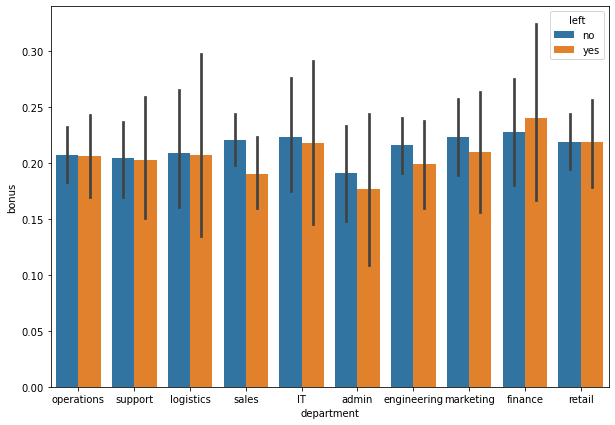

In [10]:
plt.subplots(figsize=(10,7))
sns.barplot(data=df, x='department', y='bonus', hue='left');

Вывод: столбчатая диаграмма показывает зависимость текучести кадров от получения сотрудником бонусов за свою работу в каждом из департаментов. Мы заметили, что в некотрых департаментах (Sales, IT, admin, engineering, marketing) уволившиеся работники реже получали бонус. Давайте протестируем гипотезу о том, что ушедшие в среднем получали меньше бонусов. 

Проверяем следующую гипотезу: 

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_x - \mu_y = 0 \\
&H_1: \hspace{2mm} \mu_x - \mu_y > 0 
\end{aligned}
$$

где X - люди, которые не ушли

In [11]:
df_4 = pd.pivot_table(data=df, index='department', columns='left', values='bonus', aggfunc=['mean', 'var', 'count'])
hypothesis = 0
mu_x = df_4['mean']['no']
mu_y = df_4['mean']['yes']
var_x = df_4['var']['no']
var_y = df_4['var']['yes']
n_x = df_4['count']['no']
n_y = df_4['count']['yes']

df_4['p_value'] = 1 - scs.norm.cdf((mu_x - mu_y) / np.sqrt(var_x/n_x + var_y/n_y))
df_4

mean                 var           count        p_value
left               no       yes        no       yes    no  yes          
department                                                              
IT           0.223577  0.218182  0.174299  0.172143   246  110  0.454953
admin        0.190789  0.176471  0.154898  0.146560   304  119  0.365740
engineering  0.215941  0.199085  0.169467  0.159816  1079  437  0.230493
finance      0.227891  0.240741  0.176557  0.184493   294  108  0.605428
logistics    0.208835  0.207207  0.165889  0.165766   249  111  0.486026
marketing    0.223614  0.209877  0.173922  0.166514   559  243  0.331711
operations   0.207182  0.206422  0.164409  0.164189  1086  436  0.486802
retail       0.218692  0.218684  0.171025  0.171225  1070  471  0.499862
sales        0.220654  0.189944  0.172094  0.154152  1346  537  0.065825
support      0.204589  0.202830  0.163044  0.162456   523  212  0.478641

К сожалению, статистически значимой связи обнаружить не удалось, так как везде p-value > 0.05. 

### left и review

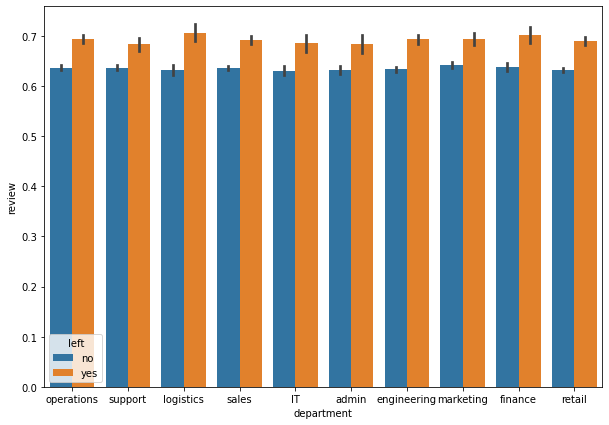

In [12]:
plt.subplots(figsize=(10,7))
sns.barplot(data=df, x='department', y='review', hue='left');

В данном случае столбчатая диаграмма показывает зависимость текучести кадров по всем департаментам от оценки, полученной в результате тестирования производительности. Можно увидеть следующую закономерность: по всем департаментам люди, которые по итогу уволились, имели более высокую оценку. А это значит, что нужно протестировать очередную гипотезу. 

Проверяем следующую гипотезу: 

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_x - \mu_y = 0 \\
&H_1: \hspace{2mm} \mu_x - \mu_y < 0 
\end{aligned}
$$

где X - люди, которые не ушли

In [13]:
pd.options.display.float_format = '{:.4f}'.format
df_5 = pd.pivot_table(data=df, index='department', columns='left', values='review', aggfunc=['mean', 'var', 'count'])
hypothesis = 0
mu_x = df_5['mean']['no']
mu_y = df_5['mean']['yes']
var_x = df_5['var']['no']
var_y = df_5['var']['yes']
n_x = df_5['count']['no']
n_y = df_5['count']['yes']

df_5['p_value'] = scs.norm.cdf((mu_x - mu_y) / np.sqrt(var_x/n_x + var_y/n_y))
df_5

mean           var        count      p_value
left            no    yes     no    yes    no  yes        
department                                                
IT          0.6311 0.6850 0.0060 0.0098   246  110  0.0000
admin       0.6328 0.6835 0.0052 0.0098   304  119  0.0000
engineering 0.6333 0.6934 0.0057 0.0090  1079  437  0.0000
finance     0.6376 0.7021 0.0049 0.0075   294  108  0.0000
logistics   0.6316 0.7054 0.0066 0.0078   249  111  0.0000
marketing   0.6416 0.6948 0.0059 0.0100   559  243  0.0000
operations  0.6371 0.6940 0.0055 0.0079  1086  436  0.0000
retail      0.6326 0.6901 0.0056 0.0098  1070  471  0.0000
sales       0.6352 0.6928 0.0055 0.0094  1346  537  0.0000
support     0.6370 0.6838 0.0052 0.0093   523  212  0.0000

Вполне ожидаемого, z-test показывает, что, действительно, имеет место разница между средними оценками review двух категорий и ушедшие работники имели более высокий review. Это говорит о том, что признак review, скорее всего, является важным в оценке целевой переменной. 

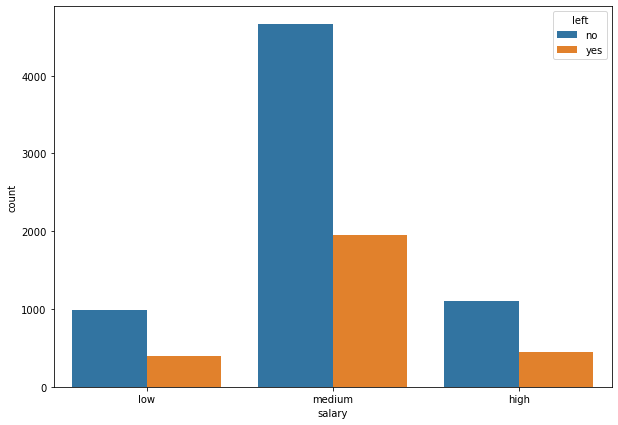

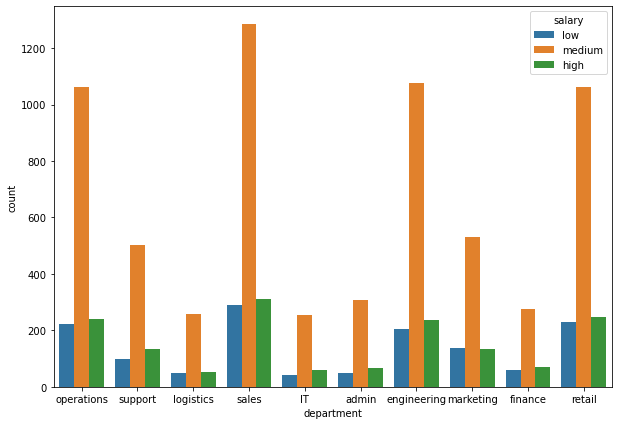

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='salary', hue='left');
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='department', hue='salary');

Вывод: столбчатая диаграмма показывает зависимость текучести кадров от получения сотрудником заработной платы. Согласно данным, выдающийся результат мы можем наблюдать в столбце со средней заработной платой. Так как работники удовлетворены суммой средней зп, у них нет стимула увольняться и они предпочитают продолжать работать. В общем, можно сказать, что вне зависимоти от зп, сотрудники решают оставаться и продолжать работать. Поэтому, результаты не очень релевантны относительно данного исследования. 

# 3. Создание новых признаков 

Можно создать признак, который будет показывать количество проработанных часов в день каждым сотрудником. Так как это более информативно, чем признак "avg_hrs_month". 

А вообще, нам нужен FEEDBACK по данному пункту, так как набор признаков в данном датасете полон, поэтому у нас возникли сложности с придумыванием новых признаков. 

In [5]:
avg_hrs_day = df['avg_hrs_month'] / 30

avg_hrs_day

0       6.028869
1       6.090272
2       6.147203
3       6.290251
4       5.994036
          ...   
9535    6.271858
9536    6.272539
9537    6.217700
9538    6.254712
9539    6.197364
Name: avg_hrs_month, Length: 9540, dtype: float64